# Procesamiento de señales

In [2]:
import pandas as pd
import numpy as np
import math
from scipy.fft import fft, ifft
import scipy.signal as sg
from statsmodels.graphics.tsaplots import plot_acf
from scipy import interpolate
import pywt
import pywt.data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")

## Análisis tiempo-frecuencia

### Análisis tiempo-frecuencia: serie de tiempo combinada

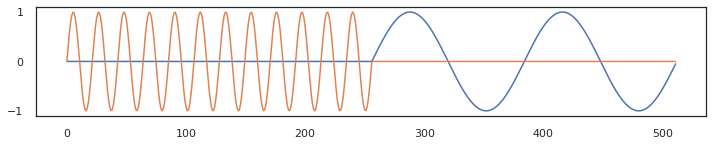

In [23]:
N = 512
tiempo = np.arange(N)
sA = [math.sin((4*2*math.pi*ti)/N) for ti in tiempo]
sA[0:int(N/2)] = np.repeat(0,int(N/2))
sB = [math.sin((24*2*math.pi*ti)/N) for ti in tiempo]
sB[int(N/2):] = np.repeat(0,int(N/2))

f, ax = plt.subplots(figsize=(12, 2))
plt.plot(tiempo, sA, tiempo, sB)

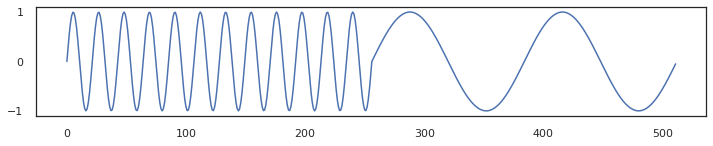

In [87]:
sAB = np.zeros(N)
for i, _ in enumerate(sA):
    sAB[i] = sA[i] + sB[i]

f, ax = plt.subplots(figsize=(12, 2))
plt.plot(tiempo, sAB)

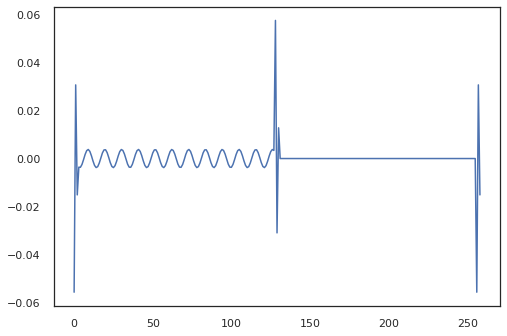

In [183]:
#pywt.wavelist()
level = 6
c = math.sqrt(2)/2
dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]
w = pywt.Wavelet('db4')
coeffs = pywt.wavedec(sAB, w, level=level, mode='periodic')
plt.plot(np.arange(len(coeffs[level])), coeffs[level], '-')
plt.show()

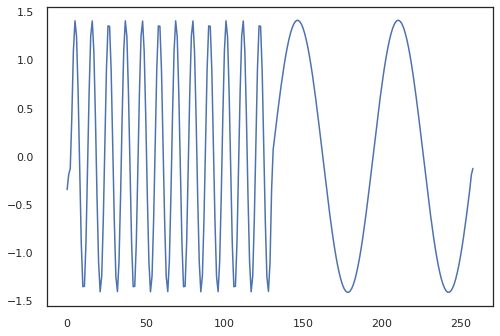

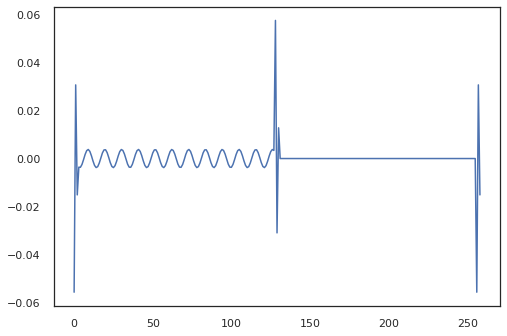

In [184]:
w = pywt.Wavelet('db4')
cA, cD = pywt.dwt(sAB, wavelet=w, mode='periodic')
plt.plot(np.arange(len(cA)), cA, '-')
plt.show()
plt.plot(np.arange(len(cD)), cD, '-')
plt.show()

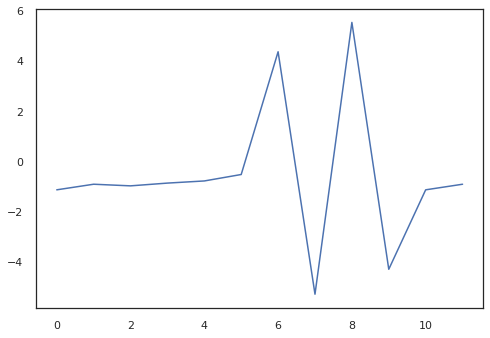

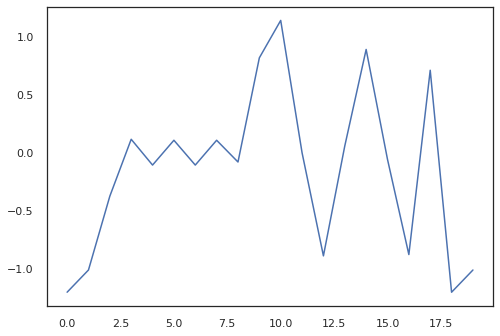

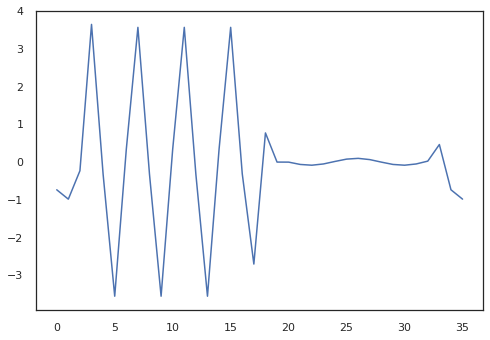

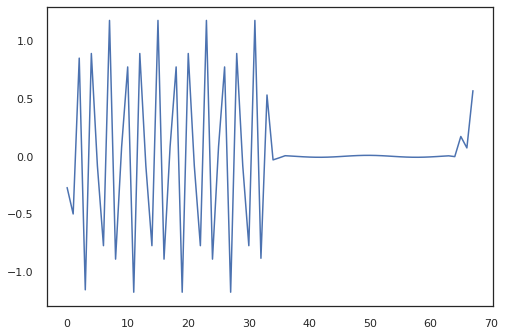

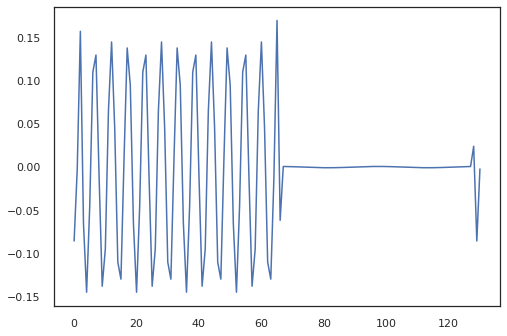

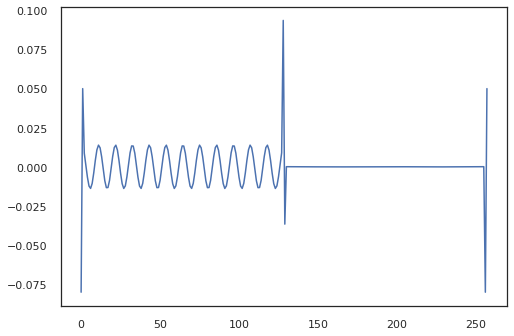

In [153]:
w = pywt.Wavelet('db3')
coeffs = pywt.wavedec(sAB, w, mode='periodic')
for level in range(1,len(coeffs)):
    plt.plot(np.arange(len(coeffs[level])), coeffs[level], '-')
    plt.show()